<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h1>Aprendizaje No Supervisado</h1>
<h2>Práctico 1 - Clustering - Punto 3</h2>
<hr>
Por David Gonzalez <leonardo.david.gonzalez@gmail.com> y Facundo Díaz Cobos <facundo.diaz.cobos@gmail.com>
</center>
<br/>

## Objetivos
En este práctico se explorarán diferentes soluciones de clustering, para desarrollar las capacidades de análisis de
soluciones de clustering. Es preferible que los conjuntos de datos con los que trabajar sean propios, ya que de esta
forma podrán aplicar su conocimiento del dominio en la interpretación de las diferentes soluciones. Alternativa-
mente, pueden usar conjuntos de datos de los ejemplos de la materia.
En los mismos, hacer una breve discusión del problema y explicar cómo puede ser útil usar técnicas de clustering.

# Consignas
Para cumplir los objetivos, realizar las siguientes actividades:

1 - Explorar soluciones con diferentes parámetros y compararlas. Por ejemplo, variar el número de clusters, las
métricas de distancia, el número de iteraciones o el número de veces que se inicializan las semillas. Describir
brevemente: número de clusters, población de cada cluster, algunas caracterı́sticas distintivas de cada cluster,
algunos elementos que se puedan encontrar en cada cluster.

2 - Incorporar un embedding como preproceso a los datos, aplicar los algoritmos de clustering después de ese
preproceso y describir la solución o soluciones resultantes, discutiendo las ventajas que resultan. Se pueden
usar:

◦ Principal
Component Analysis http://scikit-learn.org/stable/modules/generated/sklearn.
decomposition.PCA.html

◦ para texto, embeddings neuronales Gensim https://pypi.org/project/gensim/

◦ para texto, embeddings neuronales Fastext https://pypi.org/project/fasttext/

3 - Proponer (y en lo posible, implementar) métricas de evaluación de soluciones de clustering basadas en testigos.
Los testigos son pares de objetos que un experto de dominio etiqueta como “deberı́an estar en el mismo cluster”
o “deberı́an estar en distintos clusters”.

4 - El método k-means de scikit-learn no provee una forma sencilla de obtneer los objetos más cercanos al centroide
de un cluster. Proponga alguna forma de obtener una muestra de los elementos de un cluster que sean cercanos
al centroide, por ejemplo, usando clasificadores, usando distancia coseno, etc. En lo posible, implementarlos y
mostrar esos elementos, discutir la representatividad de los elementos encontrados.

# <u>RESOLUCIÓN</u>

# 3 - Proponer métricas de evaluación de soluciones de clustering basadas en testigos:

Las metrica para saber si los clusters son correctos, segun el experto de dominio, son:
    
    1 - Los clientes de un mismo cluster consumen un volumen de compra similar a nivel monto, en el mes.    
    2 - Los clientes deberían pertenecer a una misma categoría o ser de una categoría aproximada. 
    Ej: En un mismo cluster deberían estar los clientes de tipo A puro, o ser de tipo A, B y C, pero si hay mayor concentracion de tipo A, raramente debería haber clientes de tipo D.
    

# Implementación:

In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from yellowbrick.cluster.elbow import KElbowVisualizer
from sklearn.cluster import KMeans
from datetime import datetime
from IPython.display import display, HTML

import numpy as np
np.random.seed(0)

# Configuramos el tamaño de los gráficos, en pulgadas
from pylab import rcParams
rcParams['figure.figsize'] = 18, 10

Cargamos los datos:

In [3]:
data_df = pd.read_pickle('datos/clustering/punto1/datos-preformateados.pkl')
data_df.head()

,CODIGO_CLIENTE,YEAR,MONTH,DAY,CANAL,SUBCANAL,CATEGORIA,FACTURA_NUM_ID,CODIGO_ARTICULO,CANTIDAD,PRECIO_TOTAL
0,c4798d1002b95e5b0f16f09c62c95e06,2017,1,2,010,010,A,297574e436e7466386da63886436195b,000-000-6673,1.0,26.08
1,c4798d1002b95e5b0f16f09c62c95e06,2017,1,2,010,010,A,297574e436e7466386da63886436195b,000-000-11000,1.0,12.62
2,75eed0dd5091ba851cb1082f5c600404,2017,1,2,100,106,C,44cd8f14e89c775c390d2d282735057a,000-000-9800,6.0,109.16
3,75eed0dd5091ba851cb1082f5c600404,2017,1,2,100,106,C,44cd8f14e89c775c390d2d282735057a,000-000-6742,12.0,116.72
4,d7b59972e86f00e016b54288826786ae,2017,1,2,010,010,A,e9db0c1d04bba69d87e81808c012272a,000-000-11557,6.0,104.13


In [4]:
ppcp_log_norm = pd.read_pickle('datos/clustering/punto1/datos-normalizados.pkl')
ppcp_log_norm.head()

CODIGO_ARTICULO                  000-000-0236                                \
MONTH                                      1         2         3         4    
CODIGO_CLIENTE                                                                
0024531e81828540871212e10c896d71    -0.693147 -0.693147 -0.693147 -0.693147   
003c44afe6e90ba8848dfd2bdd92c03f    -0.693147 -0.693147 -0.693147 -0.693147   
004a4de5dd7ab3c72b8f86fe635bb9b8    -0.693147 -0.693147 -0.693147 -0.693147   
00a1e834d044753f4e47964143a5e904    -0.693147 -0.693147 -0.693147 -0.693147   
00bb302b07a498a606e061579e962c45    -0.693147 -0.693147 -0.693147 -0.693147   

CODIGO_ARTICULO                                                           \
MONTH                                   5         6         7         8    
CODIGO_CLIENTE                                                             
0024531e81828540871212e10c896d71 -0.693147 -0.693147 -0.693147 -0.693147   
003c44afe6e90ba8848dfd2bdd92c03f -0.693147 -0.693147 -0.693147 -0.693147   
004a4de5dd7ab3c72b8f86fe635bb9b8 -0.693147 -0.693147 -0.693147 -0.693147   
00a1e834d044753f4e47964143a5e904 -0.693147 -0.693147 -0.693147 -0.693147   
00bb302b07a498a606e061579e962c45 -0.693147 -0.693147 -0.693147 -0.693147   

CODIGO_ARTICULO                            000-000-0241      ...       \
MONTH                                   9            1       ...        
CODIGO_CLIENTE                                               ...        
0024531e81828540871212e10c896d71 -0.693147    -0.693147      ...        
003c44afe6e90ba8848dfd2bdd92c03f -0.693147    -0.693147      ...        
004a4de5dd7ab3c72b8f86fe635bb9b8 -0.693147    -0.693147      ...        
00a1e834d044753f4e47964143a5e904 -0.693147    -0.693147      ...        
00bb302b07a498a606e061579e962c45 -0.693147    -0.693147      ...        

CODIGO_ARTICULO                  000-999-c11857           000-999-c3436  \
MONTH                                        10        11            8    
CODIGO_CLIENTE                                                            
0024531e81828540871212e10c896d71      -0.693147 -0.693147     -0.693147   
003c44afe6e90ba8848dfd2bdd92c03f      -0.693147 -0.693147     -0.693147   
004a4de5dd7ab3c72b8f86fe635bb9b8      -0.693147 -0.693147     -0.693147   
00a1e834d044753f4e47964143a5e904      -0.693147 -0.693147     -0.693147   
00bb302b07a498a606e061579e962c45      -0.693147 -0.693147     -0.693147   

CODIGO_ARTICULO                                      000-999-c3747            \
MONTH                                   9         10            9         10   
CODIGO_CLIENTE                                                                 
0024531e81828540871212e10c896d71 -0.693147 -0.693147     -0.693147 -0.693147   
003c44afe6e90ba8848dfd2bdd92c03f -0.693147 -0.693147     -0.693147 -0.693147   
004a4de5dd7ab3c72b8f86fe635bb9b8 -0.693147 -0.693147     -0.693147 -0.693147   
00a1e834d044753f4e47964143a5e904 -0.693147 -0.693147     -0.693147 -0.693147   
00bb302b07a498a606e061579e962c45 -0.693147 -0.693147     -0.693147 -0.693147   

CODIGO_ARTICULO                            000-999-d4532 000-999-d5883  
MONTH                                   11            4             4   
CODIGO_CLIENTE                                                          
0024531e81828540871212e10c896d71 -0.693147     -0.693147     -0.693147  
003c44afe6e90ba8848dfd2bdd92c03f -0.693147     -0.693147     -0.693147  
004a4de5dd7ab3c72b8f86fe635bb9b8 -0.693147     -0.693147     -0.693147  
00a1e834d044753f4e47964143a5e904 -0.693147     -0.693147     -0.693147  
00bb302b07a498a606e061579e962c45 -0.693147     -0.693147     -0.693147  

[5 rows x 12807 columns]

In [5]:
# Cargamos los datos de clusters y distancias
ppcp_clusters_df = pd.read_pickle('datos/clustering/punto1/clusters.pkl')
ppcp_clusters_df.head()

,0
0,2
1,1
2,1
3,4
4,2


In [6]:
# Obtenemos los clusters de cada cliente

In [7]:
ppcp_clusters_df['CODIGO_CLIENTE'] = ppcp_log_norm.index

In [8]:
ppcp_clusters_df = ppcp_clusters_df.set_index('CODIGO_CLIENTE')

In [9]:
ppcp_clusters_df = ppcp_clusters_df.rename(columns={0: 'CLUSTER'})

In [10]:
ppcp_clusters_df = ppcp_clusters_df.reset_index()

In [11]:
ppcp_clusters_df.head()

,CODIGO_CLIENTE,CLUSTER
0,0024531e81828540871212e10c896d71,2
1,003c44afe6e90ba8848dfd2bdd92c03f,1
2,004a4de5dd7ab3c72b8f86fe635bb9b8,1
3,00a1e834d044753f4e47964143a5e904,4
4,00bb302b07a498a606e061579e962c45,2


In [12]:
# for index, row in ppcp_clusters_df.iterrows():        
#     data_df.loc[data_df['CODIGO_CLIENTE'] == row.CODIGO_CLIENTE, 'CLUSTER'] = row.CLUSTER
# data_df.head()  

In [13]:
ppc_c_df = ( data_df[['CODIGO_CLIENTE', 'MONTH', 'CANAL', 'SUBCANAL','CATEGORIA', 'PRECIO_TOTAL']]
        .groupby(['CODIGO_CLIENTE', 'MONTH', 'CANAL', 'SUBCANAL','CATEGORIA'])
        .agg({ 'PRECIO_TOTAL': 'sum'})
        .reset_index()
        .rename(columns={'PRECIO_TOTAL':'MONTO_TOTAL'})
    )   
ppc_c_df.head()

,CODIGO_CLIENTE,MONTH,CANAL,SUBCANAL,CATEGORIA,MONTO_TOTAL
0,0024531e81828540871212e10c896d71,1,010,010,C,2306.00
1,0024531e81828540871212e10c896d71,2,010,010,C,2473.73
2,0024531e81828540871212e10c896d71,3,010,010,C,2919.34
3,0024531e81828540871212e10c896d71,4,010,010,C,1965.63
4,0024531e81828540871212e10c896d71,5,010,010,C,2426.78


In [14]:
len(ppc_c_df)

21458

In [15]:
for index, row in ppcp_clusters_df.iterrows():        
    ppc_c_df.loc[ppc_c_df['CODIGO_CLIENTE'] == row.CODIGO_CLIENTE, 'CLUSTER'] = row.CLUSTER
ppc_c_df.head()  

,CODIGO_CLIENTE,MONTH,CANAL,SUBCANAL,CATEGORIA,MONTO_TOTAL,CLUSTER
0,0024531e81828540871212e10c896d71,1,010,010,C,2306.00,2.0
1,0024531e81828540871212e10c896d71,2,010,010,C,2473.73,2.0
2,0024531e81828540871212e10c896d71,3,010,010,C,2919.34,2.0
3,0024531e81828540871212e10c896d71,4,010,010,C,1965.63,2.0
4,0024531e81828540871212e10c896d71,5,010,010,C,2426.78,2.0


# 1 - Visualizacion de distribuciones por cluster:

,MONTH,MONTO_TOTAL,CLUSTER
count,71.0,71.000000,71.0
mean,1.0,18868.970704,0.0
std,0.0,14751.769966,0.0
min,1.0,4090.870000,0.0
25%,1.0,9650.595000,0.0
50%,1.0,14376.570000,0.0
75%,1.0,21436.100000,0.0
max,1.0,61669.920000,0.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ']"

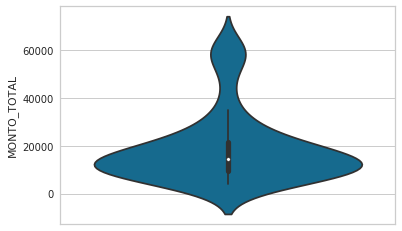

,MONTH,MONTO_TOTAL,CLUSTER
count,70.0,70.000000,70.0
mean,2.0,16427.855143,0.0
std,0.0,11703.354165,0.0
min,2.0,3225.390000,0.0
25%,2.0,10116.152500,0.0
50%,2.0,12735.160000,0.0
75%,2.0,17870.330000,0.0
max,2.0,59553.450000,0.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ']"

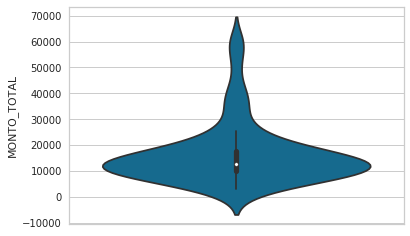

,MONTH,MONTO_TOTAL,CLUSTER
count,71.0,71.000000,71.0
mean,3.0,26353.568028,0.0
std,0.0,18160.373001,0.0
min,3.0,5071.130000,0.0
25%,3.0,15162.675000,0.0
50%,3.0,19637.040000,0.0
75%,3.0,29391.475000,0.0
max,3.0,85921.200000,0.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ']"

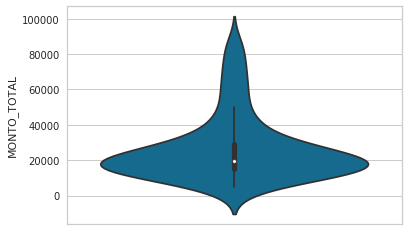

,MONTH,MONTO_TOTAL,CLUSTER
count,70.0,70.000000,70.0
mean,4.0,22033.771714,0.0
std,0.0,12896.339523,0.0
min,4.0,6503.160000,0.0
25%,4.0,13417.900000,0.0
50%,4.0,16739.810000,0.0
75%,4.0,25503.680000,0.0
max,4.0,60932.910000,0.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ']"

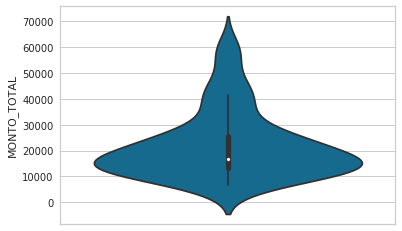

,MONTH,MONTO_TOTAL,CLUSTER
count,70.0,70.000000,70.0
mean,5.0,27436.423286,0.0
std,0.0,12402.783255,0.0
min,5.0,9277.680000,0.0
25%,5.0,18746.575000,0.0
50%,5.0,23079.290000,0.0
75%,5.0,33031.995000,0.0
max,5.0,57310.090000,0.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ']"

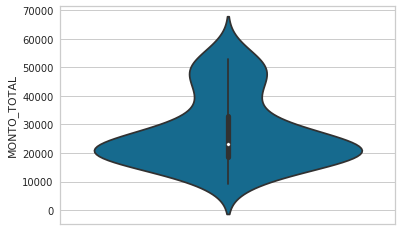

,MONTH,MONTO_TOTAL,CLUSTER
count,71.0,71.000000,71.0
mean,6.0,25946.377324,0.0
std,0.0,14357.052607,0.0
min,6.0,6673.550000,0.0
25%,6.0,16605.715000,0.0
50%,6.0,21261.850000,0.0
75%,6.0,29734.915000,0.0
max,6.0,80964.700000,0.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ']"

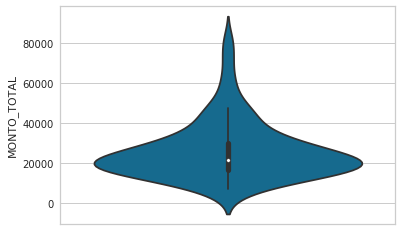

,MONTH,MONTO_TOTAL,CLUSTER
count,69.0,69.000000,69.0
mean,7.0,30453.503043,0.0
std,0.0,20415.887835,0.0
min,7.0,6789.440000,0.0
25%,7.0,17542.920000,0.0
50%,7.0,25125.890000,0.0
75%,7.0,35346.520000,0.0
max,7.0,113129.700000,0.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ']"

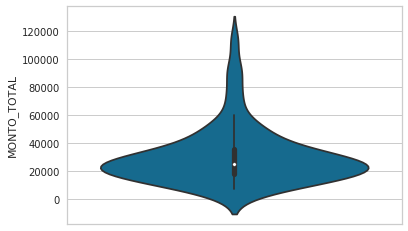

,MONTH,MONTO_TOTAL,CLUSTER
count,69.0,69.000000,69.0
mean,8.0,27284.768261,0.0
std,0.0,15693.200730,0.0
min,8.0,8321.230000,0.0
25%,8.0,18850.060000,0.0
50%,8.0,23921.120000,0.0
75%,8.0,30408.350000,0.0
max,8.0,95870.020000,0.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ']"

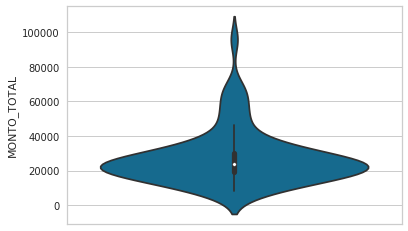

,MONTH,MONTO_TOTAL,CLUSTER
count,69.0,69.000000,69.0
mean,9.0,25874.281884,0.0
std,0.0,15105.112122,0.0
min,9.0,5184.720000,0.0
25%,9.0,16480.610000,0.0
50%,9.0,22103.750000,0.0
75%,9.0,32093.070000,0.0
max,9.0,85364.010000,0.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ']"

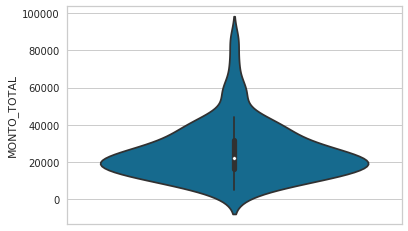

,MONTH,MONTO_TOTAL,CLUSTER
count,70.0,70.000000,70.0
mean,10.0,28681.498429,0.0
std,0.0,18477.929040,0.0
min,10.0,3616.180000,0.0
25%,10.0,17009.105000,0.0
50%,10.0,24807.425000,0.0
75%,10.0,35105.767500,0.0
max,10.0,98217.440000,0.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ']"

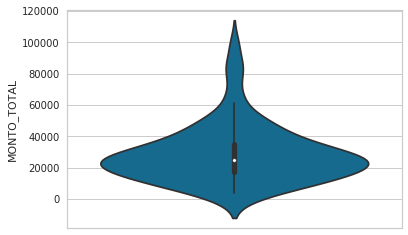

,MONTH,MONTO_TOTAL,CLUSTER
count,66.0,66.000000,66.0
mean,11.0,23592.257576,0.0
std,0.0,13442.191861,0.0
min,11.0,339.260000,0.0
25%,11.0,14059.592500,0.0
50%,11.0,19558.710000,0.0
75%,11.0,31211.532500,0.0
max,11.0,65207.580000,0.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ']"

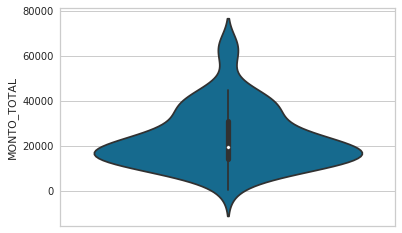

,MONTH,MONTO_TOTAL,CLUSTER
count,315.0,315.000000,315.0
mean,1.0,7127.614857,1.0
std,0.0,5086.364056,0.0
min,1.0,223.430000,1.0
25%,1.0,4088.875000,1.0
50%,1.0,5776.780000,1.0
75%,1.0,8603.985000,1.0
max,1.0,36162.650000,1.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ', 'D  ']"

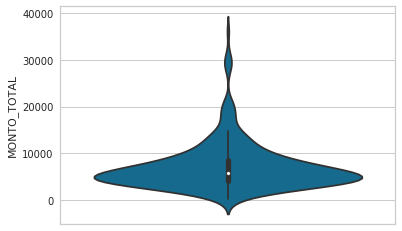

,MONTH,MONTO_TOTAL,CLUSTER
count,316.0,316.000000,316.0
mean,2.0,6867.340918,1.0
std,0.0,4681.664216,0.0
min,2.0,515.520000,1.0
25%,2.0,3896.965000,1.0
50%,2.0,5683.535000,1.0
75%,2.0,8672.312500,1.0
max,2.0,31430.320000,1.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ', 'D  ']"

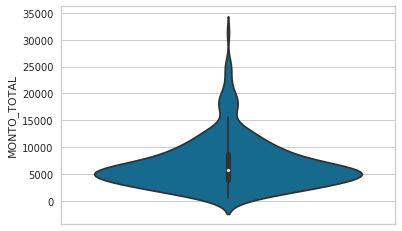

,MONTH,MONTO_TOTAL,CLUSTER
count,315.0,315.000000,315.0
mean,3.0,10488.781873,1.0
std,0.0,6303.053505,0.0
min,3.0,135.420000,1.0
25%,3.0,6226.980000,1.0
50%,3.0,8711.370000,1.0
75%,3.0,12865.955000,1.0
max,3.0,37243.230000,1.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ', 'D  ']"

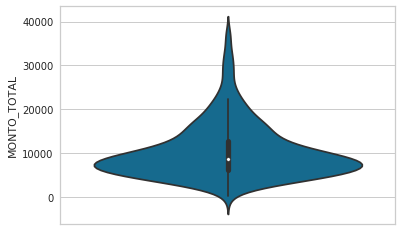

,MONTH,MONTO_TOTAL,CLUSTER
count,315.0,315.000000,315.0
mean,4.0,8820.450794,1.0
std,0.0,4931.579359,0.0
min,4.0,1450.190000,1.0
25%,4.0,5537.330000,1.0
50%,4.0,7459.270000,1.0
75%,4.0,10788.555000,1.0
max,4.0,29539.990000,1.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ', 'D  ']"

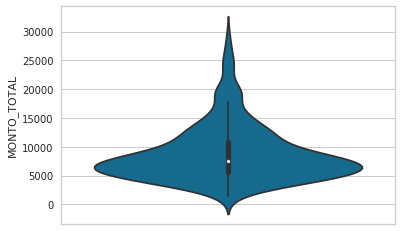

,MONTH,MONTO_TOTAL,CLUSTER
count,319.0,319.000000,319.0
mean,5.0,10209.518715,1.0
std,0.0,5088.825148,0.0
min,5.0,3246.220000,1.0
25%,5.0,6510.885000,1.0
50%,5.0,8808.900000,1.0
75%,5.0,12815.200000,1.0
max,5.0,28796.170000,1.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ', 'D  ']"

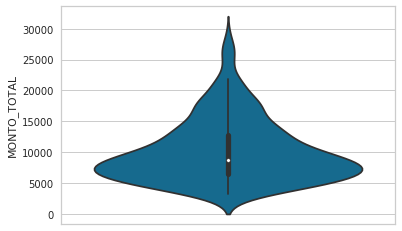

,MONTH,MONTO_TOTAL,CLUSTER
count,323.0,323.000000,323.0
mean,6.0,10766.583963,1.0
std,0.0,5052.388537,0.0
min,6.0,3097.200000,1.0
25%,6.0,7093.560000,1.0
50%,6.0,9489.990000,1.0
75%,6.0,13557.005000,1.0
max,6.0,27080.550000,1.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ', 'D  ']"

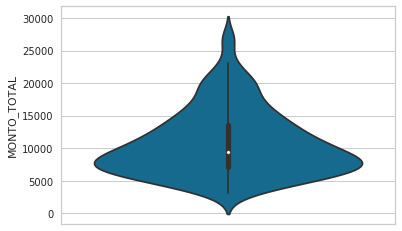

,MONTH,MONTO_TOTAL,CLUSTER
count,321.0,321.000000,321.0
mean,7.0,10300.023396,1.0
std,0.0,5056.697878,0.0
min,7.0,1196.250000,1.0
25%,7.0,6416.220000,1.0
50%,7.0,9390.530000,1.0
75%,7.0,12578.050000,1.0
max,7.0,27580.900000,1.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ', 'D  ']"

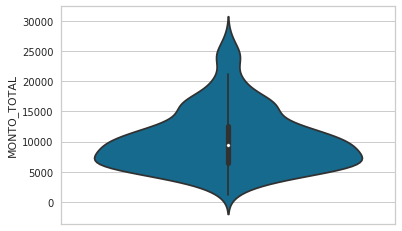

,MONTH,MONTO_TOTAL,CLUSTER
count,316.0,316.000000,316.0
mean,8.0,11220.622405,1.0
std,0.0,5477.870900,0.0
min,8.0,2639.410000,1.0
25%,8.0,7083.540000,1.0
50%,8.0,9840.590000,1.0
75%,8.0,13980.667500,1.0
max,8.0,30846.630000,1.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ', 'D  ']"

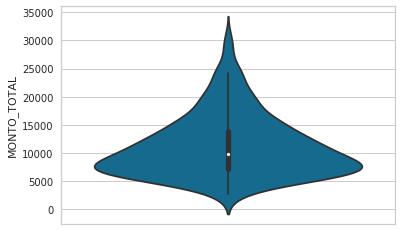

,MONTH,MONTO_TOTAL,CLUSTER
count,322.0,322.000000,322.0
mean,9.0,10796.296894,1.0
std,0.0,6001.064140,0.0
min,9.0,1780.240000,1.0
25%,9.0,6511.080000,1.0
50%,9.0,9114.025000,1.0
75%,9.0,13265.975000,1.0
max,9.0,31118.630000,1.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ', 'D  ']"

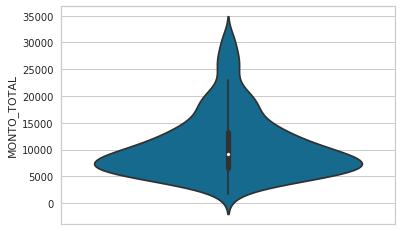

,MONTH,MONTO_TOTAL,CLUSTER
count,321.0,321.000000,321.0
mean,10.0,11892.099439,1.0
std,0.0,6921.221208,0.0
min,10.0,231.640000,1.0
25%,10.0,7066.020000,1.0
50%,10.0,9797.980000,1.0
75%,10.0,14987.070000,1.0
max,10.0,44280.140000,1.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ', 'D  ']"

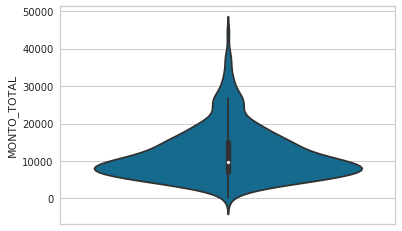

,MONTH,MONTO_TOTAL,CLUSTER
count,310.0,310.000000,310.0
mean,11.0,10059.679613,1.0
std,0.0,5408.625618,0.0
min,11.0,1585.440000,1.0
25%,11.0,6058.625000,1.0
50%,11.0,8609.595000,1.0
75%,11.0,12897.102500,1.0
max,11.0,32045.030000,1.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ', 'D  ']"

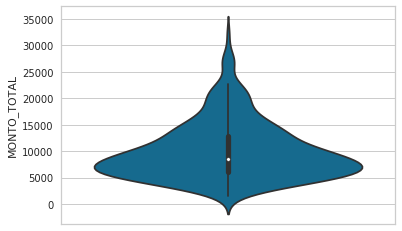

,MONTH,MONTO_TOTAL,CLUSTER
count,597.0,597.000000,597.0
mean,1.0,2823.795477,2.0
std,0.0,1906.392993,0.0
min,1.0,139.620000,2.0
25%,1.0,1476.850000,2.0
50%,1.0,2330.050000,2.0
75%,1.0,3621.480000,2.0
max,1.0,14811.520000,2.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ', 'D  ']"

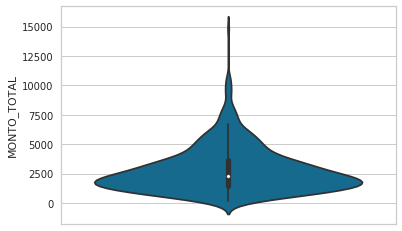

,MONTH,MONTO_TOTAL,CLUSTER
count,600.0,600.000000,600.0
mean,2.0,2851.955550,2.0
std,0.0,2166.358408,0.0
min,2.0,267.130000,2.0
25%,2.0,1517.487500,2.0
50%,2.0,2277.750000,2.0
75%,2.0,3462.525000,2.0
max,2.0,17250.290000,2.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ', 'D  ']"

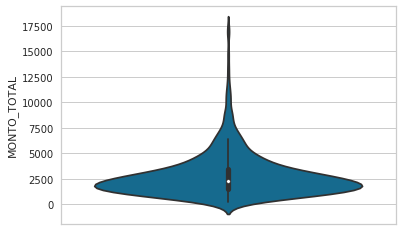

,MONTH,MONTO_TOTAL,CLUSTER
count,640.0,640.000000,640.0
mean,3.0,4690.258406,2.0
std,0.0,4895.952249,0.0
min,3.0,188.910000,2.0
25%,3.0,2308.707500,2.0
50%,3.0,3655.140000,2.0
75%,3.0,5670.750000,2.0
max,3.0,64230.860000,2.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ', 'D  ']"

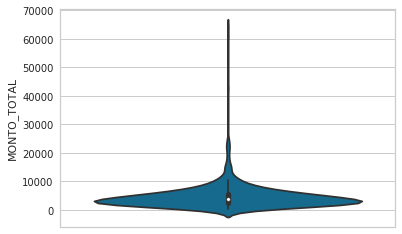

,MONTH,MONTO_TOTAL,CLUSTER
count,632.0,632.000000,632.0
mean,4.0,3536.112642,2.0
std,0.0,2376.832718,0.0
min,4.0,166.180000,2.0
25%,4.0,1870.585000,2.0
50%,4.0,3046.980000,2.0
75%,4.0,4462.230000,2.0
max,4.0,15804.940000,2.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ', 'D  ']"

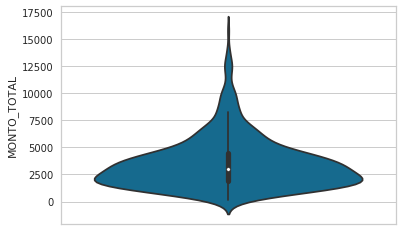

,MONTH,MONTO_TOTAL,CLUSTER
count,647.0,647.000000,647.0
mean,5.0,4331.174760,2.0
std,0.0,3149.839739,0.0
min,5.0,185.980000,2.0
25%,5.0,2351.810000,2.0
50%,5.0,3561.110000,2.0
75%,5.0,5333.980000,2.0
max,5.0,28732.520000,2.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ', 'D  ']"

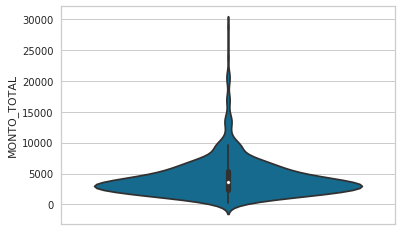

,MONTH,MONTO_TOTAL,CLUSTER
count,653.0,653.000000,653.0
mean,6.0,4428.585804,2.0
std,0.0,3039.165171,0.0
min,6.0,163.850000,2.0
25%,6.0,2446.440000,2.0
50%,6.0,3681.760000,2.0
75%,6.0,5375.310000,2.0
max,6.0,22942.250000,2.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ', 'D  ']"

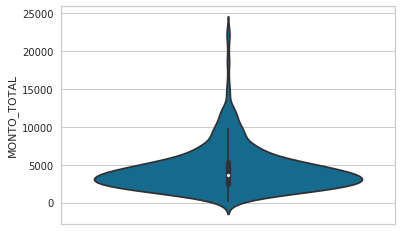

,MONTH,MONTO_TOTAL,CLUSTER
count,653.0,653.000000,653.0
mean,7.0,4157.492711,2.0
std,0.0,2628.677210,0.0
min,7.0,286.470000,2.0
25%,7.0,2380.670000,2.0
50%,7.0,3488.560000,2.0
75%,7.0,5255.260000,2.0
max,7.0,18420.420000,2.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ', 'D  ']"

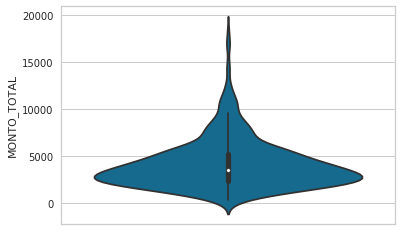

,MONTH,MONTO_TOTAL,CLUSTER
count,648.0,648.000000,648.0
mean,8.0,4541.713935,2.0
std,0.0,3220.252254,0.0
min,8.0,218.660000,2.0
25%,8.0,2476.600000,2.0
50%,8.0,3819.735000,2.0
75%,8.0,5576.825000,2.0
max,8.0,29549.800000,2.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ', 'D  ']"

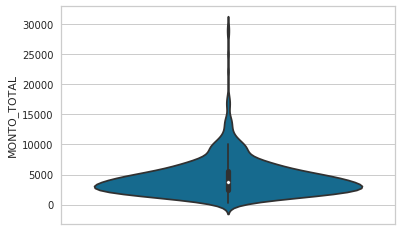

,MONTH,MONTO_TOTAL,CLUSTER
count,644.0,644.000000,644.0
mean,9.0,4389.663727,2.0
std,0.0,2892.938927,0.0
min,9.0,292.900000,2.0
25%,9.0,2436.085000,2.0
50%,9.0,3768.390000,2.0
75%,9.0,5323.437500,2.0
max,9.0,19536.780000,2.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ', 'D  ']"

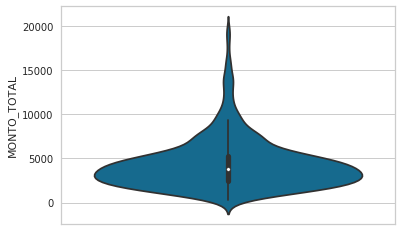

,MONTH,MONTO_TOTAL,CLUSTER
count,633.0,633.000000,633.0
mean,10.0,4834.740806,2.0
std,0.0,3975.642014,0.0
min,10.0,173.830000,2.0
25%,10.0,2526.850000,2.0
50%,10.0,3856.630000,2.0
75%,10.0,5829.450000,2.0
max,10.0,42312.240000,2.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ', 'D  ']"

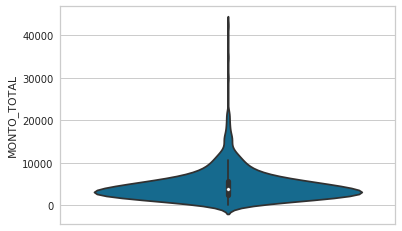

,MONTH,MONTO_TOTAL,CLUSTER
count,623.0,623.000000,623.0
mean,11.0,4408.753884,2.0
std,0.0,3234.938803,0.0
min,11.0,199.150000,2.0
25%,11.0,2235.200000,2.0
50%,11.0,3491.810000,2.0
75%,11.0,5622.120000,2.0
max,11.0,24254.830000,2.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ', 'D  ']"

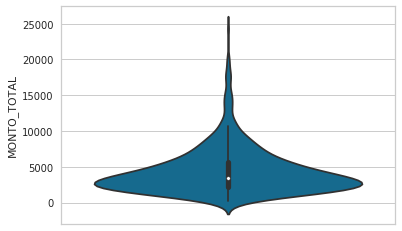

,MONTH,MONTO_TOTAL,CLUSTER
count,10.0,10.000000,10.0
mean,1.0,176641.914000,3.0
std,0.0,188905.082663,0.0
min,1.0,36085.440000,3.0
25%,1.0,61633.670000,3.0
50%,1.0,120578.000000,3.0
75%,1.0,170820.035000,3.0
max,1.0,645337.740000,3.0


"CATEGORIAS: ['A  ', 'B1 ', 'D  ']"

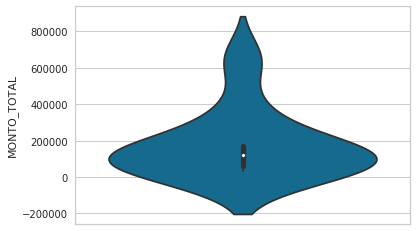

,MONTH,MONTO_TOTAL,CLUSTER
count,10.0,10.000000,10.0
mean,2.0,189587.049000,3.0
std,0.0,229293.541116,0.0
min,2.0,37543.260000,3.0
25%,2.0,79731.582500,3.0
50%,2.0,114299.930000,3.0
75%,2.0,174053.740000,3.0
max,2.0,807990.950000,3.0


"CATEGORIAS: ['A  ', 'B1 ', 'D  ']"

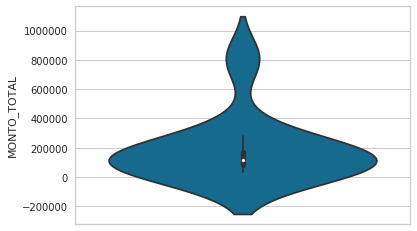

,MONTH,MONTO_TOTAL,CLUSTER
count,10.0,1.000000e+01,10.0
mean,3.0,3.166515e+05,3.0
std,0.0,3.383383e+05,0.0
min,3.0,4.828863e+04,3.0
25%,3.0,9.397724e+04,3.0
50%,3.0,2.015611e+05,3.0
75%,3.0,3.318476e+05,3.0
max,3.0,1.067521e+06,3.0


"CATEGORIAS: ['A  ', 'B1 ', 'D  ']"

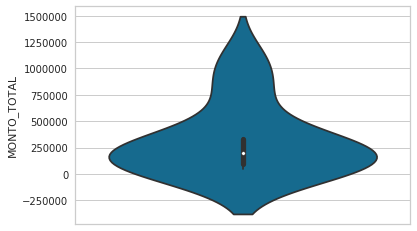

,MONTH,MONTO_TOTAL,CLUSTER
count,10.0,10.000000,10.0
mean,4.0,224784.006000,3.0
std,0.0,171877.709792,0.0
min,4.0,38672.990000,3.0
25%,4.0,112832.055000,3.0
50%,4.0,166725.765000,3.0
75%,4.0,306895.222500,3.0
max,4.0,529882.840000,3.0


"CATEGORIAS: ['A  ', 'B1 ', 'D  ']"

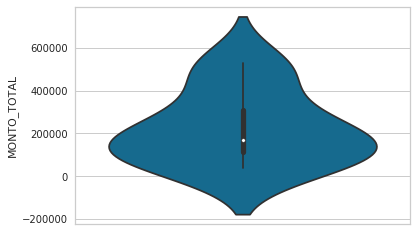

,MONTH,MONTO_TOTAL,CLUSTER
count,10.0,10.000000,10.0
mean,5.0,215465.696000,3.0
std,0.0,185624.519449,0.0
min,5.0,42317.760000,3.0
25%,5.0,94623.325000,3.0
50%,5.0,171837.160000,3.0
75%,5.0,251642.495000,3.0
max,5.0,643743.050000,3.0


"CATEGORIAS: ['A  ', 'B1 ', 'D  ']"

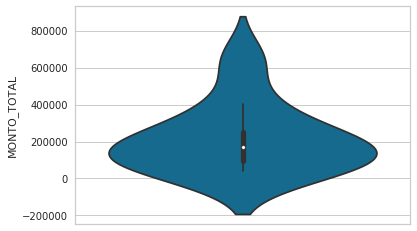

,MONTH,MONTO_TOTAL,CLUSTER
count,10.0,10.000000,10.0
mean,6.0,261338.280000,3.0
std,0.0,248558.592462,0.0
min,6.0,50612.520000,3.0
25%,6.0,106976.357500,3.0
50%,6.0,184809.390000,3.0
75%,6.0,270152.357500,3.0
max,6.0,835458.740000,3.0


"CATEGORIAS: ['A  ', 'B1 ', 'D  ']"

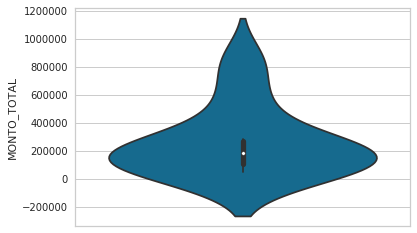

,MONTH,MONTO_TOTAL,CLUSTER
count,10.0,10.000000,10.0
mean,7.0,267914.098000,3.0
std,0.0,217958.897482,0.0
min,7.0,41861.310000,3.0
25%,7.0,117061.295000,3.0
50%,7.0,219755.955000,3.0
75%,7.0,333976.017500,3.0
max,7.0,679148.050000,3.0


"CATEGORIAS: ['A  ', 'B1 ', 'D  ']"

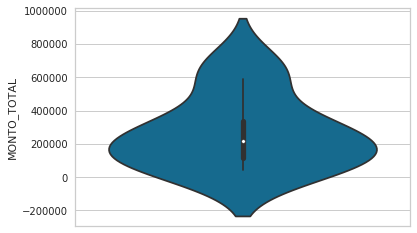

,MONTH,MONTO_TOTAL,CLUSTER
count,10.0,10.000000,10.0
mean,8.0,252623.886000,3.0
std,0.0,203239.648298,0.0
min,8.0,52954.780000,3.0
25%,8.0,119264.322500,3.0
50%,8.0,185270.110000,3.0
75%,8.0,288009.995000,3.0
max,8.0,642699.400000,3.0


"CATEGORIAS: ['A  ', 'B1 ', 'D  ']"

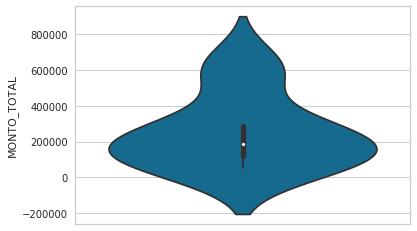

,MONTH,MONTO_TOTAL,CLUSTER
count,10.0,1.000000e+01,10.0
mean,9.0,3.122926e+05,3.0
std,0.0,3.832465e+05,0.0
min,9.0,4.815304e+04,3.0
25%,9.0,1.111572e+05,3.0
50%,9.0,1.826547e+05,3.0
75%,9.0,2.783924e+05,3.0
max,9.0,1.322293e+06,3.0


"CATEGORIAS: ['A  ', 'B1 ', 'D  ']"

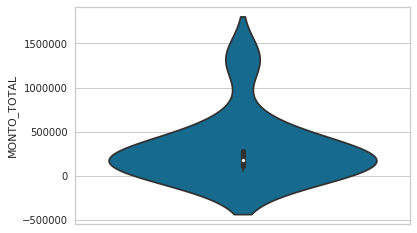

,MONTH,MONTO_TOTAL,CLUSTER
count,10.0,10.000000,10.0
mean,10.0,298057.298000,3.0
std,0.0,240767.427536,0.0
min,10.0,61668.810000,3.0
25%,10.0,120293.832500,3.0
50%,10.0,224607.275000,3.0
75%,10.0,374473.690000,3.0
max,10.0,712666.890000,3.0


"CATEGORIAS: ['A  ', 'B1 ', 'D  ']"

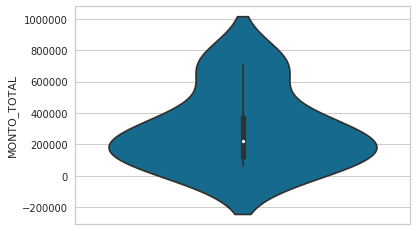

,MONTH,MONTO_TOTAL,CLUSTER
count,10.0,10.000000,10.0
mean,11.0,208443.087000,3.0
std,0.0,176414.354418,0.0
min,11.0,31299.550000,3.0
25%,11.0,87156.345000,3.0
50%,11.0,182347.330000,3.0
75%,11.0,229869.812500,3.0
max,11.0,610790.240000,3.0


"CATEGORIAS: ['A  ', 'B1 ', 'D  ']"

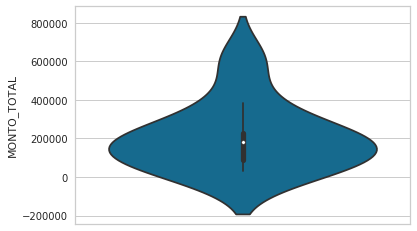

,MONTH,MONTO_TOTAL,CLUSTER
count,632.0,632.000000,632.0
mean,1.0,1310.713956,4.0
std,0.0,1615.297637,0.0
min,1.0,58.690000,4.0
25%,1.0,463.755000,4.0
50%,1.0,863.670000,4.0
75%,1.0,1466.895000,4.0
max,1.0,12167.080000,4.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ', 'D  ']"

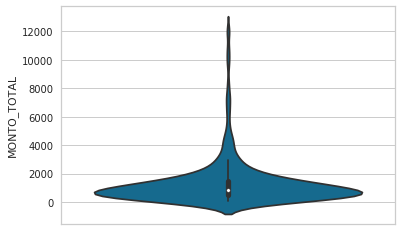

,MONTH,MONTO_TOTAL,CLUSTER
count,612.0,612.000000,612.0
mean,2.0,1172.098154,4.0
std,0.0,1424.581416,0.0
min,2.0,62.470000,4.0
25%,2.0,434.542500,4.0
50%,2.0,798.030000,4.0
75%,2.0,1335.117500,4.0
max,2.0,14209.930000,4.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ', 'D  ']"

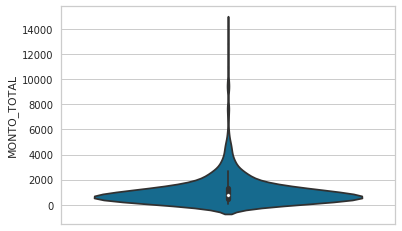

,MONTH,MONTO_TOTAL,CLUSTER
count,713.0,713.000000,713.0
mean,3.0,1605.738822,4.0
std,0.0,1943.595474,0.0
min,3.0,33.320000,4.0
25%,3.0,502.270000,4.0
50%,3.0,1032.770000,4.0
75%,3.0,1929.590000,4.0
max,3.0,17630.100000,4.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ', 'D  ']"

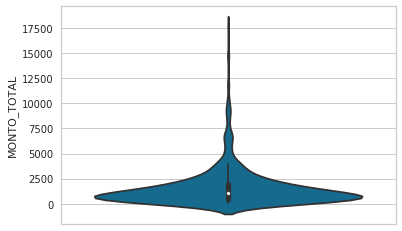

,MONTH,MONTO_TOTAL,CLUSTER
count,696.0,696.000000,696.0
mean,4.0,1259.779296,4.0
std,0.0,1199.978542,0.0
min,4.0,9.640000,4.0
25%,4.0,487.625000,4.0
50%,4.0,907.805000,4.0
75%,4.0,1669.605000,4.0
max,4.0,9341.500000,4.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ', 'D  ']"

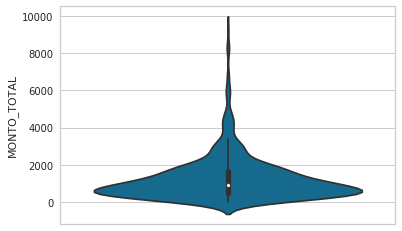

,MONTH,MONTO_TOTAL,CLUSTER
count,708.0,708.000000,708.0
mean,5.0,1464.428573,4.0
std,0.0,1448.983053,0.0
min,5.0,40.410000,4.0
25%,5.0,504.817500,4.0
50%,5.0,1033.565000,4.0
75%,5.0,1874.627500,4.0
max,5.0,10357.340000,4.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ', 'D  ']"

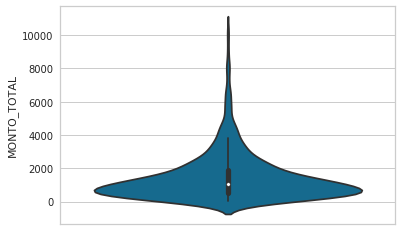

,MONTH,MONTO_TOTAL,CLUSTER
count,718.0,718.000000,718.0
mean,6.0,1500.684777,4.0
std,0.0,1416.521782,0.0
min,6.0,60.180000,4.0
25%,6.0,557.577500,4.0
50%,6.0,1071.590000,4.0
75%,6.0,2007.022500,4.0
max,6.0,12973.470000,4.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ', 'D  ']"

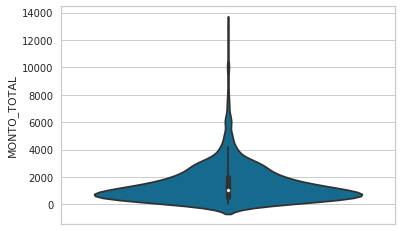

,MONTH,MONTO_TOTAL,CLUSTER
count,696.0,696.000000,696.0
mean,7.0,1427.935718,4.0
std,0.0,1477.108132,0.0
min,7.0,18.440000,4.0
25%,7.0,534.215000,4.0
50%,7.0,991.595000,4.0
75%,7.0,1748.197500,4.0
max,7.0,14165.520000,4.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ', 'D  ']"

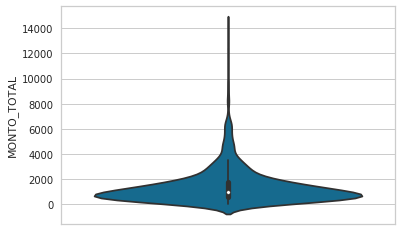

,MONTH,MONTO_TOTAL,CLUSTER
count,703.0,703.000000,703.0
mean,8.0,1539.537383,4.0
std,0.0,1459.145127,0.0
min,8.0,14.300000,4.0
25%,8.0,618.920000,4.0
50%,8.0,1129.840000,4.0
75%,8.0,1963.670000,4.0
max,8.0,12725.040000,4.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ', 'D  ']"

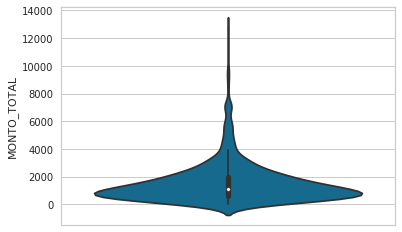

,MONTH,MONTO_TOTAL,CLUSTER
count,672.0,672.000000,672.0
mean,9.0,1650.140253,4.0
std,0.0,1721.133248,0.0
min,9.0,46.600000,4.0
25%,9.0,630.092500,4.0
50%,9.0,1138.725000,4.0
75%,9.0,2109.462500,4.0
max,9.0,13225.200000,4.0


"CATEGORIAS: ['B1 ', 'B2 ', 'C  ', 'D  ']"

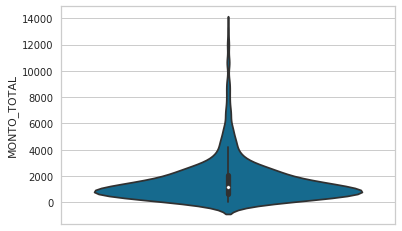

,MONTH,MONTO_TOTAL,CLUSTER
count,705.0,705.000000,705.0
mean,10.0,2044.925277,4.0
std,0.0,3720.399392,0.0
min,10.0,74.200000,4.0
25%,10.0,605.000000,4.0
50%,10.0,1191.870000,4.0
75%,10.0,2035.100000,4.0
max,10.0,46885.570000,4.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ', 'D  ']"

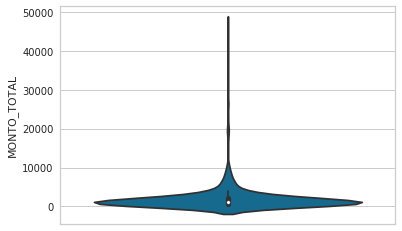

,MONTH,MONTO_TOTAL,CLUSTER
count,674.0,674.000000,674.0
mean,11.0,2297.690757,4.0
std,0.0,4293.227837,0.0
min,11.0,27.420000,4.0
25%,11.0,638.785000,4.0
50%,11.0,1167.495000,4.0
75%,11.0,2356.195000,4.0
max,11.0,65051.440000,4.0


"CATEGORIAS: ['A  ', 'B1 ', 'B2 ', 'C  ', 'D  ']"

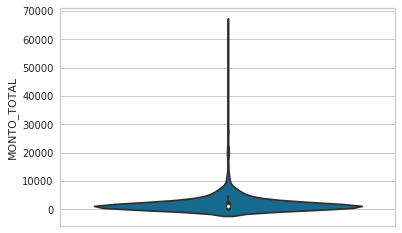

In [29]:
display( HTML('<h1>* MONTOS Y CATEGORIAS POR CLUSTER: </h1>') )

n_clusters = ppcp_clusters_df.CLUSTER.max()
for i in range(n_clusters):    

    for j in range(1,12): # Por mes:
        
        display( HTML('<hr/><h3> CLUSTER '+ str(i) +' - MES ' + str(j) + ":</h2>" ) )
        cluster_mes = ppc_c_df[ (ppc_c_df.CLUSTER == i) & (ppc_c_df.MONTH == j) ]
        
        # Removemos outliers 
        cluster_mes = cluster_mes[np.abs(cluster_mes.MONTO_TOTAL-cluster_mes.MONTO_TOTAL.mean()) <= (cluster_mes.MONTO_TOTAL.std()*3)]

        display(cluster_mes.describe())
        sns.violinplot(y=cluster_mes.MONTO_TOTAL)
        display('CATEGORIAS: ' + str( sorted(cluster_mes.CATEGORIA.unique() .tolist())))
        plt.show()


* Nota: Este mecanismo sirvió para mostrar los valores considerados como testigos. Luego de revisar mejor la composición de los clusters se encuentra que hay que refinar mejor la clusterización realizada ya que existen clusters que poseen valores demasiado lejos de la media y categorías que no deberían estar juntas.